In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df


C:\Users\wrnaf\AppData\Local\Temp\ipykernel_2492\1109453146.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
#to understand if imbalanced: look at value counts for the outcome
diabetes_df['Outcome'].value_counts()

#really this is dataset where we do not need to use over/undersampling because it is not that imbalanced

Outcome
0    500
1    268
Name: count, dtype: int64

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('Outcome',axis=1)
y= diabetes_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size =.3,
                                                    random_state =32,
                                                    stratify = y)



# Oversamlpling

In [8]:
#%pip install imblearn
#resample our training data with RandomeOverSampler (Naive Approach)
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=32)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


In [10]:
#train using resampled data
model = LogisticRegression(random_state =32)
model.fit(X_resampled, y_resampled)

C:\Users\wrnaf\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=32)

In [12]:
y_pred = model.predict(X_test)

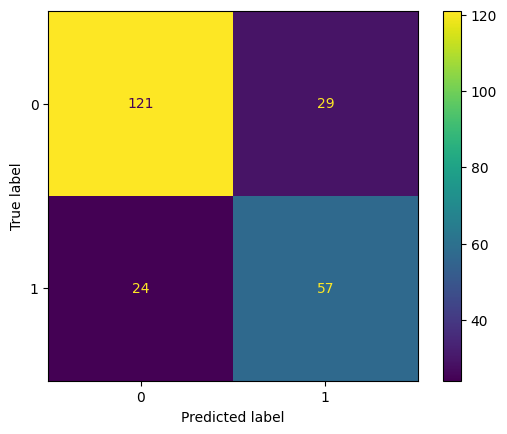

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [15]:
#what is out recall?
#TP/(TP+FN)
57/ (57+24)

0.7037037037037037

In [16]:
#old recall
30/(30+24)


0.5555555555555556

# Undersampling

In [17]:
#clusterCentroids uses k-means to redice the number of smaples
from imblearn.under_sampling(random_state =32)

rus = ClusteredCentroids(random_state = 32)
X_resampled, y_resampled = rus.fit(X_resampled,y_resampled)


SyntaxError: invalid syntax (3420972273.py, line 2)

In [18]:
y_pred = model.predict(X_test)

In [ ]:
ConfusionMatrixn